In [1]:
# load style
from ROOT import gROOT

path = '/Users/yy/cernbox/'
# path = '/eos/user/y/youyou/'
gROOT.SetMacroPath(path+"atlasstyle/")
gROOT.LoadMacro("AtlasLabels.C")
gROOT.LoadMacro("AtlasStyle.C")
gROOT.LoadMacro("AtlasUtils.C")
from ROOT import SetAtlasStyle, ATLASLabel, myText, myMarkerText
SetAtlasStyle()
#gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.26/08

Applying ATLAS style settings...



In [2]:
# load lib
import ROOT
import os, sys
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [75]:
# load data

data_folder = './data/'
pulse = np.loadtxt(data_folder + 'pule_shape.txt')  # pulse shape
adc = np.loadtxt(data_folder + 'adc_out.txt')       # simulated adc output
signal = np.loadtxt(data_folder + 'signal.txt')     # delta func signal
pileup = np.loadtxt(data_folder + 'pileup.txt')     # pileup noise
wiener = np.loadtxt(data_folder + 'wiener_out.txt') # wiener filter output
of_coeff = np.loadtxt(data_folder + 'of_coeffs.txt')# optimal filter coefficients 
of_out = np.loadtxt(data_folder + 'of_out.txt')     # optimal filter output with above coeffs

plot_folder = './plots/'

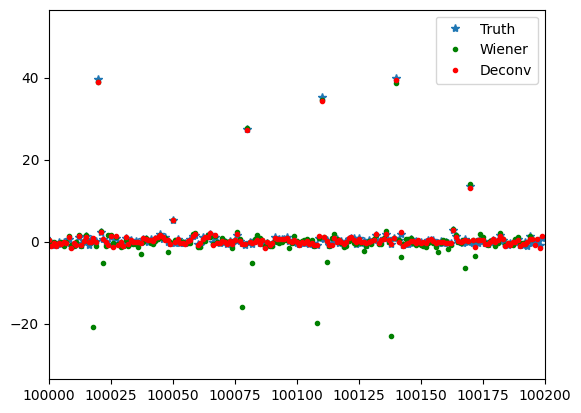

In [4]:
# code from brigitte
# first sight of the deconvolution and wiener output

pulse_pad=0*adc
pulse_pad[:len(pulse)]=pulse

pulseft=np.fft.rfft(pulse_pad)
adcft=np.fft.rfft(adc)
thresh=0.0  #if the pulse FT goes to zero, you can use this to condition the deconvolution
mask=np.abs(adcft)<thresh
if np.sum(mask)>0:
    tmp=pulseft.copy()
    tmp[mask]=tmp[mask]+thresh
    filt=1/tmp
else:
    filt=1/pulseft  #this would be a standard deconvolution

deconv=np.fft.irfft(adcft*filt)
#deconv=deconv#-np.median(deconv)
i1=100000
i2=100200
plt.clf()

truth=signal+pileup

plt.figure(1)
plt.clf()
demedian=True
if demedian:
    plt.plot(truth[:i2]-np.median(truth),'*')
    plt.plot(wiener[4:i2]-np.median(wiener),'g.')
    plt.plot(deconv[:i2]-np.median(deconv),'r.')
else:
    plt.plot(truth[:i2],'*')
    plt.plot(wiener[4:i2],'go')
    plt.plot(deconv[:i2],'r.')


plt.xlim(i1,i2)
plt.legend(['Truth','Wiener','Deconv'])
plt.show()
# plt.savefig('reconstruction.png')

rms/median deconvolution err:  0.38331823905332807 0.2534017597912934
rms/median wiener err:  3.033477392194672 0.4623109999999999


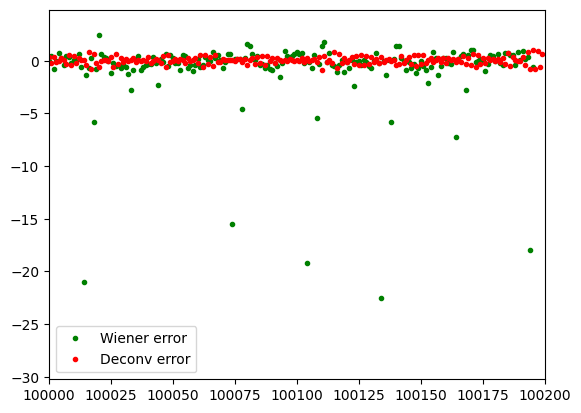

In [5]:
# code from brigitte
# continue above

err=deconv[:len(signal)]-(signal+pileup)
err=err-np.median(err)
print('rms/median deconvolution err: ',np.std(err[1000:-1000]),np.median(np.abs(err[1000:-1000])))
werr=wiener[4:len(signal)]#-(signal+pileup)
werr=werr-(signal+pileup)[:len(werr)]
werr=werr-np.median(werr)
print('rms/median wiener err: ',np.std(werr[1000:-1000]),np.median(np.abs(werr[1000:-1000])))

plt.figure(2)
plt.clf()
plt.plot(werr[4:i2]-np.median(werr),'g.')
plt.plot(err[:i2]-np.median(err),'r.')
plt.xlim(i1,i2)
plt.legend(['Wiener error','Deconv error'])
plt.show()
#plt.savefig('reconstruction_errors.png')

## pulse shape

Info in <TCanvas::Print>: pdf file ./plots/pulse_shape.pdf has been created


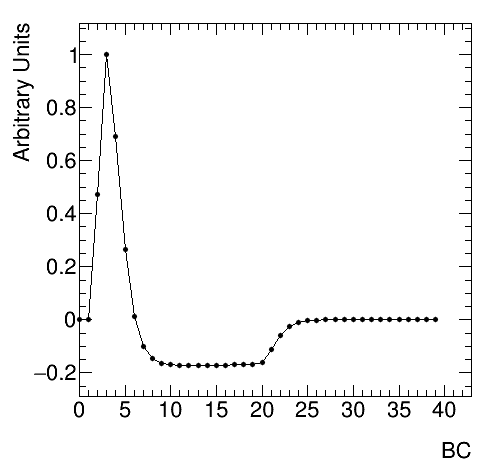

In [7]:
# Create TGraph object
n_points = len(pulse)
graph = ROOT.TGraph(n_points)

# Fill TGraph object with pulse data
for i in range(n_points):
    graph.SetPoint(i, i, pulse[i])

# Set x and y axis titles
graph.GetXaxis().SetTitle("BC")
graph.GetYaxis().SetTitle("Arbitrary Units")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)

# Draw the graph
canvas = ROOT.TCanvas("canvas", "Pulse Graph", 500, 500)
graph.SetTitle("Pulse Shape")
graph.Draw("APL")
canvas.Draw()

canvas.Print(plot_folder+"pulse_shape.pdf")

## ploting functions

In [4]:
def plot_curve(signal=signal, x_min=0, x_max=len(signal)):    
    # Create TGraph object
    n_points = len(signal)
    graph = ROOT.TGraph(n_points)

    # Fill TGraph object with signal data
    for i in range(n_points):
        graph.SetPoint(i, i, signal[i])

    # Set x and y axis titles
    graph.GetXaxis().SetTitle("BC")
    graph.GetYaxis().SetTitle("ADC count")
    graph.GetYaxis().SetTitleOffset(0.8)
    graph.GetXaxis().SetLimits(x_min, x_max)
    graph.SetTitle('signal')

    return graph


In [5]:
def plot_hist(signal, x_min=0, x_max=500):
    n_bins = x_max-x_min

    # Create TH1F histogram object
    histogram = ROOT.TH1F(str(signal), str(signal), n_bins, x_min, x_max)

    # Set histogram content to pileup data
    histogram.SetContent(signal[x_min: x_max])
    histogram.SetLineWidth(1)

    # Set x and y axis titles
    histogram.GetYaxis().SetTitle("ADC count")
    histogram.GetXaxis().SetTitle("BC")
    histogram.GetYaxis().SetTitleOffset(0.8)

    return histogram

## signal

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


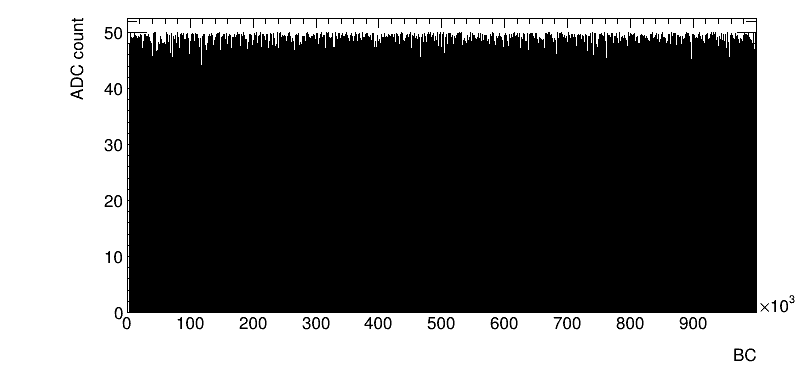

In [10]:
h = plot_hist(signal,0,len(signal))
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: [0. 0. 0. ... 0. 0. 0.] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


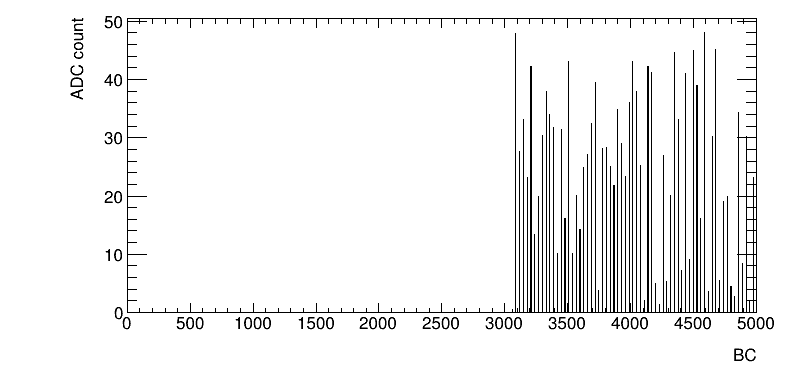

In [11]:
h = plot_hist(signal,0,5000)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: [0. 0. 0. ... 0. 0. 0.] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/signal_partition.pdf has been created


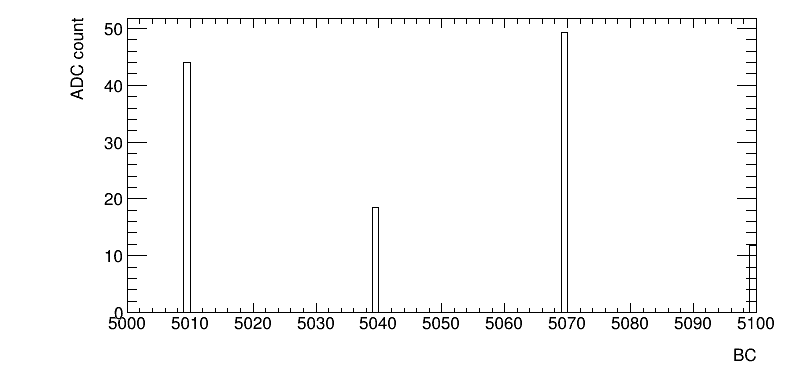

In [12]:
h = plot_hist(signal,5000,5100)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()
canvas.Print(plot_folder+"signal_partition.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: [0. 0. 0. ... 0. 0. 0.] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/signal_partition.pdf has been created


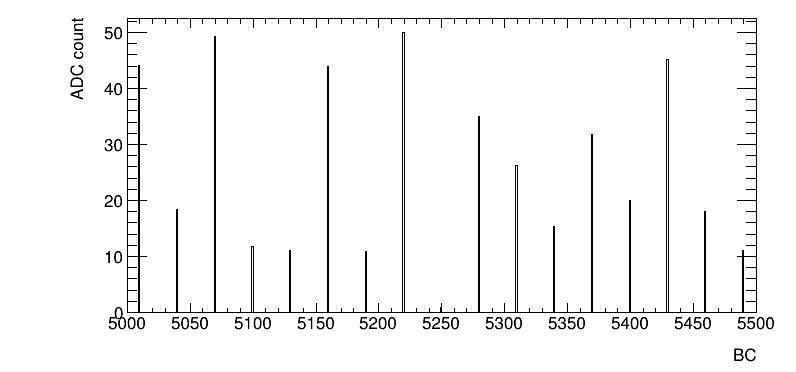

In [13]:
h = plot_hist(signal,5000,5500)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()
canvas.Print(plot_folder+"signal_partition.pdf")

## pile up

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


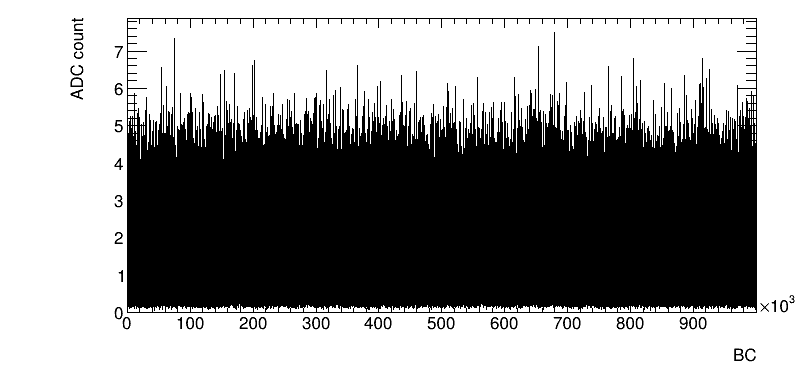

In [14]:
h = plot_hist(pileup,0,len(pileup))
canvas = ROOT.TCanvas("canvas", "pileup Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: [2.675229 0.977085 1.117406 ... 1.573923 0.793955 1.936442] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/pileup_partition.pdf has been created


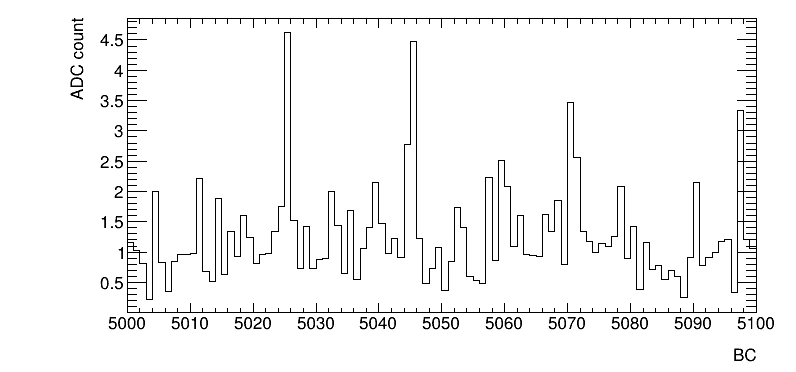

In [15]:
h = plot_hist(pileup,5000,5100)
canvas = ROOT.TCanvas("canvas", "pileup Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()
canvas.Print(plot_folder+"pileup_partition.pdf")

## ADC

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


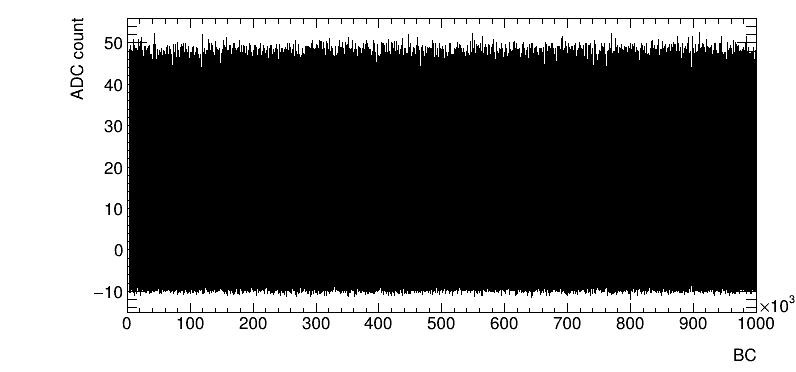

In [16]:
h = plot_hist(adc,0,len(adc))
canvas = ROOT.TCanvas("canvas", "pileup Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -3.959317 -5.719013 -6.268919] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


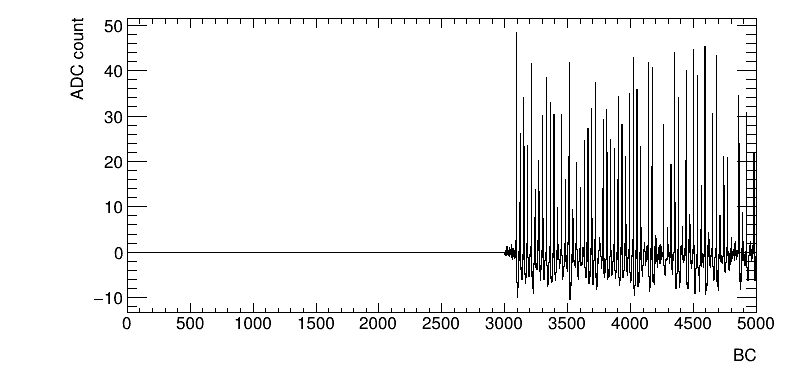

In [17]:
h = plot_hist(adc,0,5000)
canvas = ROOT.TCanvas("canvas", "pileup Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/adc_partition.pdf has been created


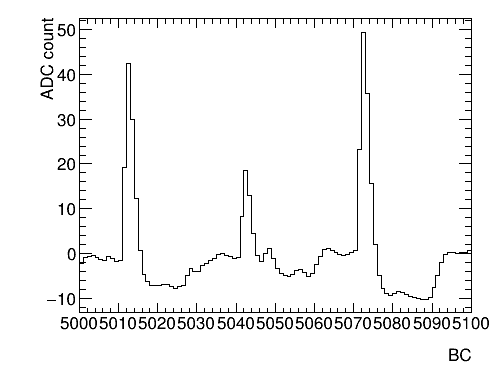

In [238]:
h = plot_hist(adc,5000,5100)
canvas = ROOT.TCanvas("canvas", "pileup Graph", 500, 400)

h.Draw()
canvas.Update()
canvas.Draw()
canvas.Print(plot_folder+"adc_partition.pdf")

## OF coeff

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/of_coefficient.pdf has been created


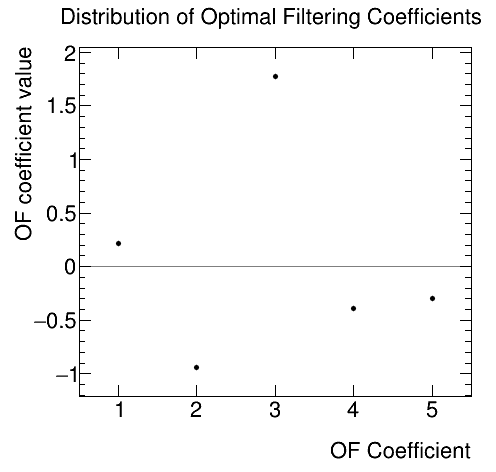

In [19]:
# Create TGraph object
n_points = len(of_coeff)
graph = ROOT.TGraph(n_points)

# Fill TGraph object with pulse data
for i in range(n_points):
    graph.SetPoint(i, i+1, of_coeff[i])

# Set x and y axis titles
graph.GetXaxis().SetTitle("OF Coefficient")
graph.GetYaxis().SetTitle("OF coefficient value")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)

graph.GetXaxis().SetNdivisions(n_points)
graph.GetXaxis().SetLimits(0.5, n_points+0.5)

line = ROOT.TLine(0.5, 0, n_points+0.5, 0)
line.SetLineColorAlpha(ROOT.kBlack, 0.5)
line.SetLineWidth(1)

# Draw the graph
canvas = ROOT.TCanvas("canvas", "of Graph", 500, 500)
graph.SetTitle("of coefficient")
graph.Draw("AP")
line.Draw()

canvas.cd()
canvas.SetTopMargin(0.1)
title = ROOT.TPaveText(5, 3.7, 0.9, 0.95, "NB")
title.SetFillColor(0)
title.SetFillStyle(0)
title.SetBorderSize(0)
title.SetTextFont(42)
title.SetTextSize(0.05)
title.AddText("Distribution of Optimal Filtering Coefficients")
title.Draw()

canvas.Draw()
canvas.Print(plot_folder+"of_coefficient.pdf")

## OF out

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


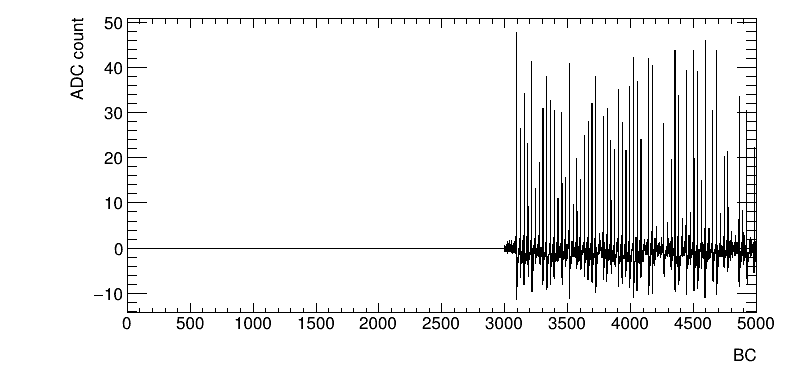

In [20]:
h = plot_hist(of_out,0,5000)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -4.674194 -6.818824 -4.34425 ] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


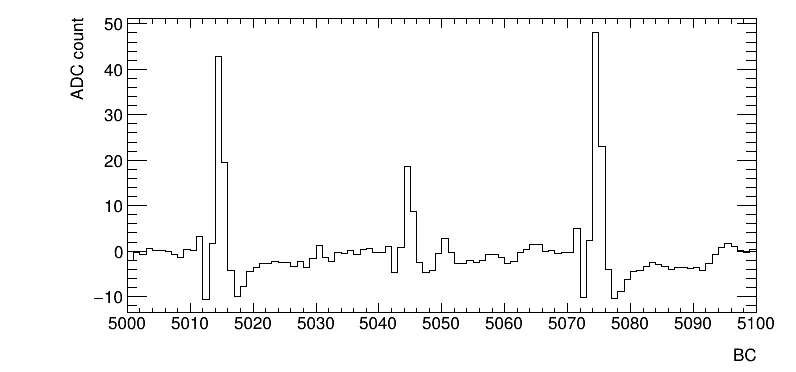

In [21]:
h = plot_hist(of_out,5000,5100)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h.Draw()
canvas.Update()
canvas.Draw()

## OF & ADC

Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -3.959317 -5.719013 -6.268919] (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -4.674194 -6.818824 -4.34425 ] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/adc_of.pdf has been created


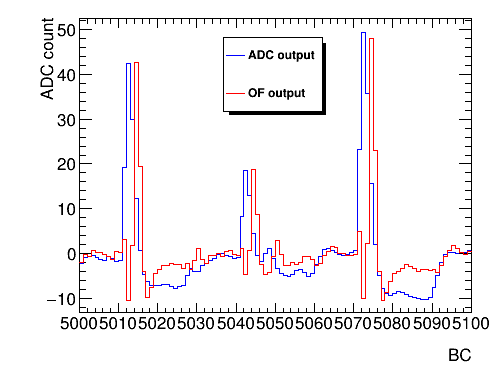

In [239]:
h1 = plot_hist(adc[:],5000,5100)
h2 = plot_hist(of_out[:],5000,5100)
# h2 = plot_hist(of_out[2:],5000,5100)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 500, 400)

h2.SetLineColorAlpha(ROOT.kRed, 1)
h1.SetLineColorAlpha(ROOT.kBlue, 1)
'''h1.SetFillColorAlpha(ROOT.kRed, 0.3)
h2.SetFillColorAlpha(ROOT.kBlue, 0.3)'''

h1.Draw()
h2.Draw('same')

legend = ROOT.TLegend(0.45, 0.7, 0.65, 0.9)  # x1, y1, x2, y2
legend.AddEntry(h1, "ADC output", "l")
legend.AddEntry(h2, "OF output", "l")
legend.Draw()

canvas.Update()
canvas.Draw()
canvas.Print(plot_folder+"adc_of.pdf")

## apply OF coeff to adc out

In [ ]:
# i wrote the convolution myself... this is same as numpy.convolve()

def apply_of(adc=adc, of_coeff=of_coeff):
    result = []
    n = len(of_coeff)
    adc = np.array(adc)
    #result = np.array(result, dtype=np.float64)

    for i in range(n,len(adc)):
        sum_i = np.sum([adc[i-j] * of_coeff[j] for j in range(n)])
        result += [sum_i]

    return np.array(result)



adc_of = apply_of(of_coeff=[0.216309, -0.940796, 1.77594, -0.391205, -0.300415])

Warning in <TROOT::Append>: Replacing existing TH1: [ 0.          0.          0.         ... -4.64827397 -6.79374032
 -4.33795972] (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -4.674194 -6.818824 -4.34425 ] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/apply_of.pdf has been created


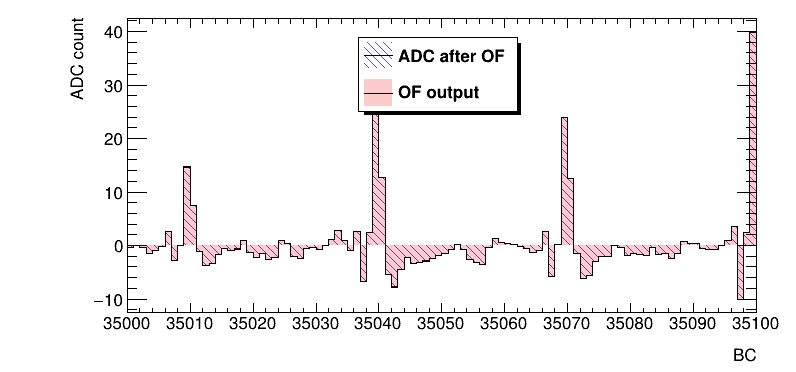

In [33]:
# to see if the apply_of func is correct,
# if the output is the same as of_out

h1 = plot_hist(adc_of,35000,35100)
h2 = plot_hist(of_out[5:],35000,35100)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)


h1.SetFillColorAlpha(ROOT.kBlue, 0.7)
h1.SetFillStyle(3005)                   
h2.SetFillColorAlpha(ROOT.kRed, 0.2)      
h2.SetFillStyle(1001)                      

h1.Draw()
h2.Draw('same')

legend = ROOT.TLegend(0.45, 0.7, 0.65, 0.9)
legend.AddEntry(h1, "ADC after OF", "fl")
legend.AddEntry(h2, "OF output", "fl")
legend.Draw()

canvas.Update()
canvas.Draw()

canvas.Print(plot_folder+"apply_of.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file ./plots/diff_part.pdf has been created


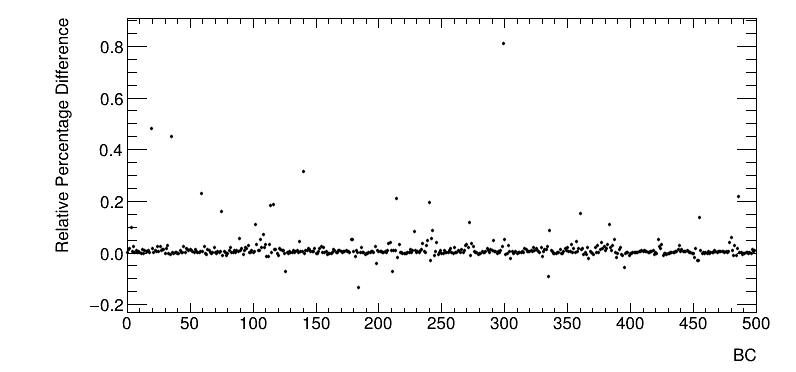

In [37]:
# to see if outpout(of_out) is the same as of_out(adc_of)
# plot their residual

diff = [(j-i)/1 for i,j in zip(adc_of, of_out[5:])]
diff = [i if not np.isnan(i) else 0 for i in diff]
diff = [i if not i == -np.inf else 0 for i in diff]
diff = [i if not i == np.inf else 0 for i in diff]

diff = diff[200000:200500]

g = plot_curve(diff, 0, len(diff))
g.GetXaxis().SetRangeUser(200000, 200500)
g.GetYaxis().SetTitle("Relative Percentage Difference")
g.GetYaxis().SetDecimals(True)
g.GetYaxis().SetTitleOffset(1)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)
g.SetMarkerSize(0.3)
g.Draw("AP")

canvas.Draw()

canvas.Print(plot_folder+"diff_part.pdf")

## distribution of residual

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file ./plots/diff_cut.png has been created


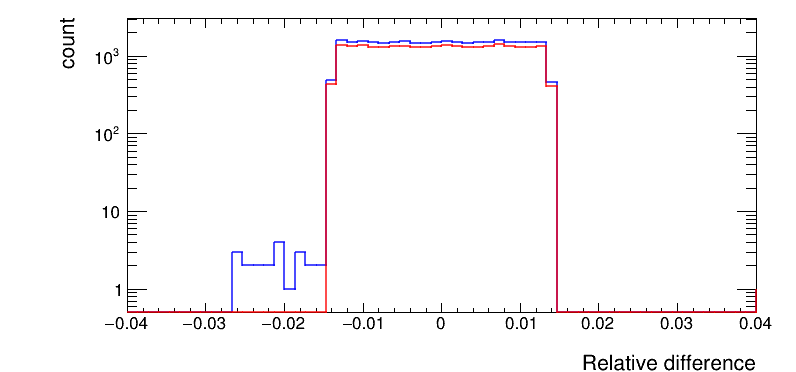

In [197]:
h1 = ROOT.TH1F("hist", "Difference Histogram", 60, -0.04, 0.04)
h2 = ROOT.TH1F("hist", "Difference Histogram", 60, -0.04, 0.04)

# Fill the histogram with the values from the diff array
for i in range(len(diff)):
    if signal[i]+pileup[i] > 10:
        h1.Fill(diff[i])
        h2.Fill(diff[i])
    elif signal[i]+pileup[i] > 5:
        h1.Fill(diff[i])

canvas = ROOT.TCanvas("canvas", "Difference Histogram", 800, 400)

# Set the x and y axis titles
h1.GetXaxis().SetTitle("Relative difference")
h1.GetYaxis().SetTitle("count")
h1.SetMarkerStyle(0)
h1.GetYaxis().SetTitleOffset(0.8)
h1.GetYaxis().SetTitleSize(0.06)
h1.GetXaxis().SetTitleSize(0.06)

h2.SetLineColorAlpha(ROOT.kRed, 0.7)
h1.SetLineColorAlpha(ROOT.kBlue, 0.7)

h1.Draw()
h2.Draw('same')

legend = ROOT.TLegend(0.55, 0.75, 0.9, 0.9)  # x1, y1, x2, y2
legend.AddEntry(h1, "ADC output above 5 GeV", "l")
legend.AddEntry(h2, "ADC output above 10 GeV", "l")
#legend.Draw()

canvas.SetLogy ( 1 )
canvas.Draw()
canvas.Print(plot_folder+"diff_cut.png")

Warning in <TROOT::Append>: Replacing existing TH1: 2d_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file ./plots/relative_diff_corre.png has been created


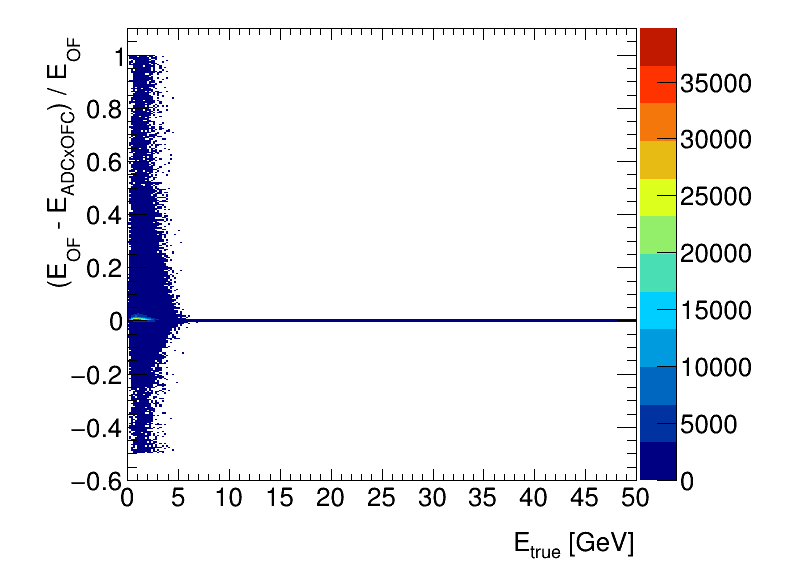

In [124]:
# Create TH2F histogram object
x_min = 0
x_max = 50
y_min = -0.6
y_max = 1.1
histogram = ROOT.TH2F("2d_hist", "2D Histogram", 250, x_min, x_max, 340, y_min, y_max)

# Fill the histogram with data
for i in range(len(signal)):
    x = signal[i] + pileup[i]
    y = diff[i]
    histogram.Fill(x, y)

# Set x and y axis titles
histogram.GetXaxis().SetTitle("E_{true} [GeV]")
histogram.GetYaxis().SetTitle(" (E_{OF} - E_{ADCxOFC}) / E_{OF} ")
histogram.GetYaxis().SetTitleOffset(1)

#ROOT.gStyle.SetPalette(ROOT.kBird)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "2D Histogram", 800, 600)
histogram.Draw("colz")
canvas.SetRightMargin(0.2)


'''canvas.SetTopMargin(0.1)
title = ROOT.TPaveText(45, 11, 15, 0.95, "NB")
title.SetFillColor(0)
title.SetFillStyle(0)
title.SetBorderSize(0)
title.SetTextFont(42)
title.SetTextSize(0.05)
title.AddText("correlation between (E_{reconstructed} - E_{true}) and E_{true}")
title.Draw()'''


canvas.Draw()

canvas.Print(plot_folder+"relative_diff_corre.png")

Warning in <TROOT::Append>: Replacing existing TH1: 2d_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file ./plots/relative_diff_corre.png has been created


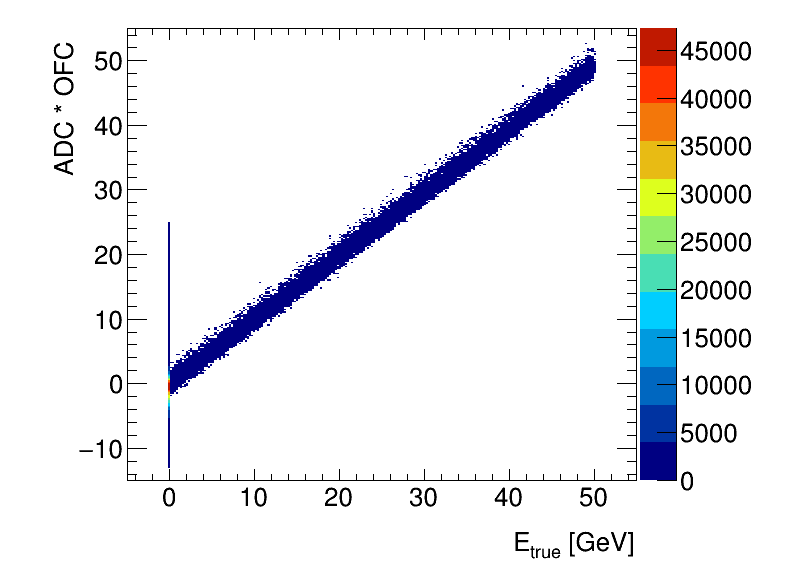

In [237]:
# Create TH2F histogram object
x_min = -5
x_max = 55
y_min = -15
y_max = 55
histogram = ROOT.TH2F("2d_hist", "2D Histogram", 250, x_min, x_max, 340, y_min, y_max)

# Fill the histogram with data
for i in range(len(signal)):
    x = signal[i] 
    y = adc_of[i]
    histogram.Fill(x, y)

# Set x and y axis titles
histogram.GetXaxis().SetTitle("E_{true} [GeV]")
histogram.GetYaxis().SetTitle(" ADC * OFC ")
histogram.GetYaxis().SetTitleOffset(1)

#ROOT.gStyle.SetPalette(ROOT.kBird)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "2D Histogram", 800, 600)
histogram.Draw("colz")
canvas.SetRightMargin(0.2)

canvas.Draw()

canvas.Print(plot_folder+"relative_diff_corre.png")

Warning in <TROOT::Append>: Replacing existing TH1: 2d_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file ./plots/relative_diff_corre.png has been created


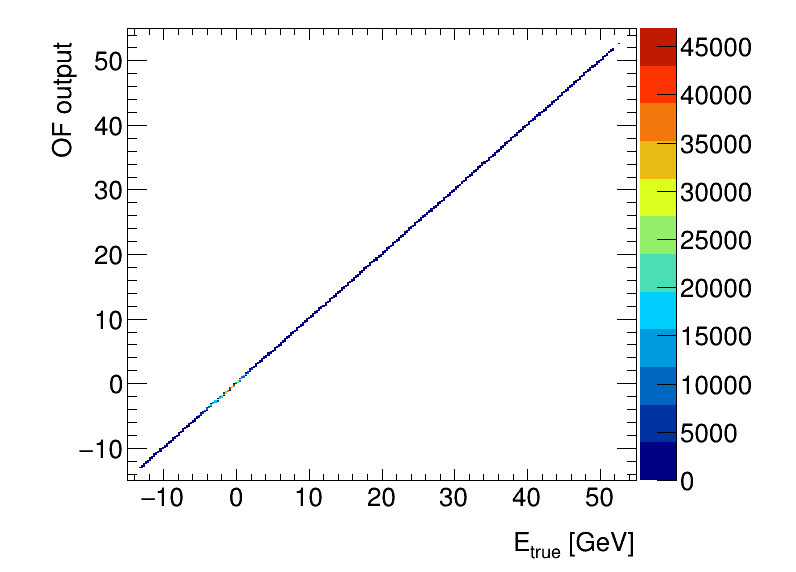

In [235]:
# Create TH2F histogram object
x_min = -15
x_max = 55
y_min = -15
y_max = 55
histogram = ROOT.TH2F("2d_hist", "2D Histogram", 250, x_min, x_max, 340, y_min, y_max)
of_new = of_out[5:]

# Fill the histogram with data
for i in range(len(signal)):
    x = adc_of[i] 
    y = of_new[i]
    histogram.Fill(x, y)

# Set x and y axis titles
histogram.GetXaxis().SetTitle("E_{true} [GeV]")
histogram.GetYaxis().SetTitle(" OF output ")
histogram.GetYaxis().SetTitleOffset(1)

#ROOT.gStyle.SetPalette(ROOT.kBird)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "2D Histogram", 800, 600)
histogram.Draw("colz")
canvas.SetRightMargin(0.2)

canvas.Draw()

canvas.Print(plot_folder+"relative_diff_corre.png")

## 2D correlation of residual and $E_{true}$

Warning in <TROOT::Append>: Replacing existing TH1: [0. 0. 0. ... 0. 0. 0.] (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: [ 0.        0.        0.       ... -3.959317 -5.719013 -6.268919] (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


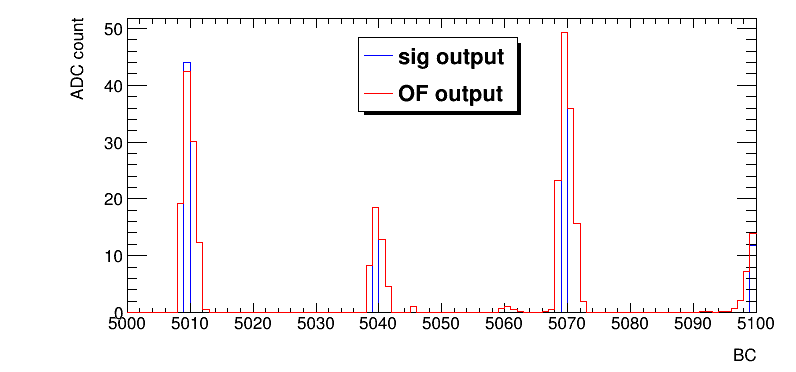

In [18]:
h1 = plot_hist(signal[:],5000,5100)
h2 = plot_hist(adc[3:],5000,5100)
# h2 = plot_hist(of_out[2:],5000,5100)
canvas = ROOT.TCanvas("canvas", "Signal Graph", 800, 400)

h2.SetLineColorAlpha(ROOT.kRed, 1)
h1.SetLineColorAlpha(ROOT.kBlue, 1)
'''h1.SetFillColorAlpha(ROOT.kRed, 0.3)
h2.SetFillColorAlpha(ROOT.kBlue, 0.3)'''

h1.Draw()
h2.Draw('same')

legend = ROOT.TLegend(0.45, 0.7, 0.65, 0.9)  # x1, y1, x2, y2
legend.AddEntry(h1, "sig output", "l")
legend.AddEntry(h2, "OF output", "l")
legend.Draw()

canvas.Update()
canvas.Draw()

In [88]:
# define my own color palette

from array import array

def set_palette(name='palette', ncontours=12):
    """Set a color palette from a given RGB list
    stops, red, green and blue should all be lists of the same length
    see set_decent_colors for an example"""

    if name == "gray" or name == "grayscale":
        stops = [0.00, 0.34, 0.61, 0.84, 1.00]
        red   = [1.00, 0.84, 0.61, 0.34, 0.00]
        green = [1.00, 0.84, 0.61, 0.34, 0.00]
        blue  = [1.00, 0.84, 0.61, 0.34, 0.00]
    else:
        # default palette, looks cool
        stops = [0.00, 0.34, 0.61, 0.84, 1.00]
        red   = [0.00, 0.00, 0.87, 1.00, 0.51]
        green = [0.00, 0.81, 1.00, 0.20, 0.00]
        blue  = [0.51, 1.00, 0.12, 0.00, 0.00]

        


    s = array('d', stops)
    r = array('d', red)
    g = array('d', green)
    b = array('d', blue)

    npoints = len(s)
    ROOT.TColor.CreateGradientColorTable(npoints, s, r, g, b, ncontours)
    ROOT.gStyle.SetNumberContours(ncontours)

set_palette()

Warning in <TROOT::Append>: Replacing existing TH1: 2d_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file ./plots/correlation.png has been created


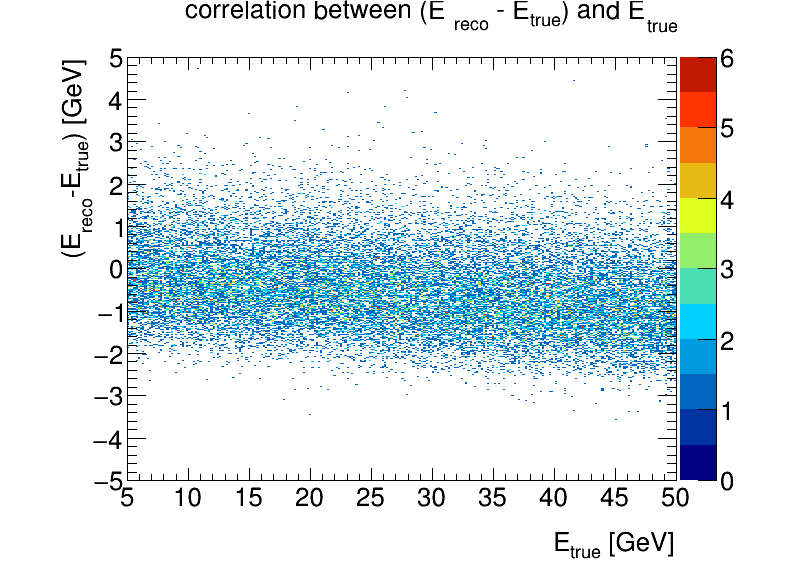

In [174]:
# Create TH2F histogram object
x_min = 5
x_max = 50
y_min = -5
y_max = 5
histogram = ROOT.TH2F("2d_hist", "2D Histogram", 250, x_min, x_max, 500, y_min, y_max)
of_new = of_out[5:]

# Fill the histogram with data
for i in range(len(signal)):
    x = signal[i]
    y = of_new[i] - signal[i]
    histogram.Fill(x, y)

# Set x and y axis titles
histogram.GetXaxis().SetTitle("E_{true} [GeV]")
histogram.GetYaxis().SetTitle("(E_{reco}-E_{true}) [GeV]")
histogram.GetYaxis().SetTitleOffset(0.8)

#ROOT.gStyle.SetPalette(ROOT.kBird)

# Draw the histogram
canvas = ROOT.TCanvas("canvas", "2D Histogram", 800, 600)
histogram.Draw("colz")
canvas.SetRightMargin(0.15)


canvas.SetTopMargin(0.1)
title = ROOT.TPaveText(45, 11, 15, 0.95, "NB")
title.SetFillColor(0)
title.SetFillStyle(0)
title.SetBorderSize(0)
title.SetTextFont(42)
title.SetTextSize(0.05)
title.AddText("correlation between (E_{reco} - E_{true}) and E_{true}")
title.Draw()


canvas.Draw()

canvas.Print(plot_folder+"correlation.png")